In [30]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')
%matplotlib inline

### Decision and uncetainity: decison making based on incomplete information

Making decision based on sample- incomplete data
- trying to choose two views of the world, based on data in a sample
- its not always clear whether the data are consistent with one view or the other
- random samples can turn out quite extreme. It's possible out conclusion might not be true. 

### Testing Hypotheses

- a statistical test chooses between two views of how data were generated-- `hypotheses`
- the test picks the `hypothesis` that is better supported by the observed data
- steps:
    - simulate data under one of the hypotheses
    - compare the simulation results and the observed data
    - pick one of the hypotheses, based on consistency of simulation results and observed data

### Null and Alternative hypotheses

The method only works if we can simulate data under one of the hypotheses

Null hypothesis: The `Chance model`
  - a well defined `chance` model about how the data were generated
  - it say that the data were generated at random under clearly specified assumptions about randomness
  - the `null` reinforces the idea that if the data look different from what the null hypothesis predicts, the difference is due to `nothing` but `chance`

#### Alternative hypothesis

   - a different view about the origin of the data
   - it could be as simple as saying the null hypothesis is wrong
    
#### Test statistics:
 - the statistics that we choose to simulate under the null hypothesis, to decide between the two hypotheses
 - questions to ask before test statistic
     - what value of the statistics will make us lean towatds the null hypothesis?
     - what values will make uslean towards the alternative?

#### Prediction undet the null hypothesis: 

   - simulate test statistivs under the null hypothesis, 
   - draw the histogrm simulated values -- this will give us the empirical distribution of the `statistic` under the null hypothesis
   - it shows all the likely values of the statistic and how likely they are if the null hypothesis is true
   
#### Conclusion:
   - Compare the observed test statistic and its empirical distribution under the null hpothesis.
   - If the observed value is not consistent with the emperical distribution, then the test favors the alternative-- "Rejects the null hypothesis"
    

### Performing a Test 
The Problem: The GSI’s Defense

A Berkeley Statistics class of about 350 students was divided into 12 discussion sections led by Graduate Student Instructors (GSIs). After the midterm, students in Section 3 noticed that their scores were on average lower than the rest of the class. In such situations, students tend to grumble about the section’s GSI. Surely, they feel, there must have been something wrong with the GSI’s teaching. Or else why would their section have done worse than others?

**Null Hypothesis**. GSI's position: The average score of the students in Section 3 is like the average score of the same number of students picked at random from the class.

**Alternative Hypothesis**. No, the averagew score is too low. Randomness is not the only reason for the low scores.


In [4]:
# Load data

scores = pd.read_csv('scores_by_section.csv')
scores.head()

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20


In [7]:
# Score by section
scores.groupby('Section').count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30


In [8]:
# Average score by ssection
scores.groupby('Section').mean()

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
6,15.031250
7,16.625000
8,16.310345
9,14.566667


In [38]:
# Null: The sectio 3 average is like the average of 27 random scores from the class.
# Alternative: No, its too low.

# The statistics is average value. Low average value favor the 'Alternative view'
observed_average = 13.666667
# Averaeg midterm from random sampling
random_average = scores.Midterm.sample(27).mean() 
print("Is observed_average > randomly sampled? ",observed_average > random_average)

Is observed_average > randomly sampled?  False


In [27]:
# Let's simulate sample averages under the Null hypothesis

averages = []
repetitions = 50000

for i in np.arange(repetitions):
    new_avg = np.average(scores.Midterm.sample(27))
    averages.append(new_avg)

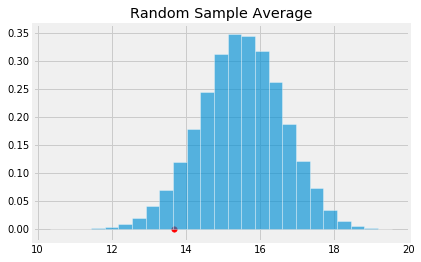

In [31]:
# Visualize using 
pd.DataFrame(averages, 
             columns=['Random Sample Average']).hist(
    bins=25,
    edgecolor='white', 
    alpha=0.65,normed=True)
plt.scatter(observed_average, 0, color='red', s=30)
plt.show()


In [37]:
# Compute areas of the hist below the ovserved_average or 
# the proportio of the data represented within the tail area
print("Proportion of simulated midterm average below observed {}%".format(
    np.count_nonzero(np.array(averages) <= observed_average)*100 / repetitions))

Proportion of simulated midterm average below observed 5.652%


**Conclusion**: Following the convention (p_value=5%), 5.657% > 5% and statisticcally significant. And it favours the Null hypothesis-- the data is seems from randomness 

### A/B Testing

- Deciding whether two numerical samples, sample A and B, come from the same underlying distribution is called A/B testing. 

**Smokers and Nonsmokers**

Objective of the study: One of the aims of the study was to see whether maternal smoking was associated with birth weight. Let’s see what we can say about the two variables

In [39]:
# Load data for A/B testing

baby = pd.read_csv('baby.csv')
baby.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [47]:
# Create smoker and non-smoker table
smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight.groupby('Maternal Smoker').count()

,Birth Weight
Maternal Smoker,
False,715
True,459


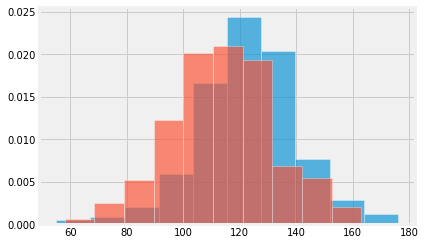

In [80]:
# Distribution of birth weight
non_smoker = smoking_and_birthweight[smoking_and_birthweight['Maternal Smoker'] == False]
smoker = smoking_and_birthweight[smoking_and_birthweight['Maternal Smoker'] == True]

non_smoker['Birth Weight'].hist(edgecolor='white', alpha=0.65,normed=True)
smoker['Birth Weight'].hist(edgecolor='white', alpha=0.65,normed=True)
# plt.legend()
plt.show()

In [100]:
# Comparing average birth weight
means = smoking_and_birthweight.groupby('Maternal Smoker', 
                                        as_index=False).mean()['Birth Weight']
observed_diff = means.loc[0]-means.loc[1]
print("Could this difference be by chance or could it be reflected in the population ?",
      observed_diff)

Could this difference be by chance or could it be reflected in the population ? 9.266142572024918


### Hypotheses and Statistic

Random sample of mothers of newborns. Compare
   - (A) Birth weights of babies of whose mothers smoked during preganancy
   - (B) Birth weights of babies whose mothers didn't smoked during preganancy
**Question**: Could the difference be due to chance alone?

**Null**:
   - In the population, the distributions of the birth weights of the babies in the two groups are the same, i.e., the difference is due to chace!

**Alternative**:
   - In the population, the babies of the mothers who didn't smoke were heavier, on average, than the babies of the smokers

*Statistic*: Difference between average weights: Group_B - Group_A averages
- Large values of this statistics favor the alternative

### Simulating under the Null

- It depends on the idea that if the `Null` is true, then the two distributions of both weights are exactly the same, so it doesn't matter which birth weight is labeled `smoker` and which is labeled as `non-smoker`.
- So if we take all birth weights (1,174), each one labled as `smoker` or `non-smoker`, we could randomly shuffle the labels, and we could get the same distribution of the two groups.

Steps to get simulated test statistics under the null hypothesis:

1. Shuffle all the birth weights
2. Assign some to `Group A` and the rest to `Group B`, maintaining the two sample sizes
3. Find the difference between the averages of the two shuffles groups
4. Repeat 1) to 3)

In [201]:
import random
# Get weight col for shuffling
original_shuffled_weights = baby[['Maternal Smoker', 'Birth Weight']]
# columns = ['Maternal_Smoker', 'Birth_Weight']

original_shuffled_weights = original_shuffled_weights.rename(columns={'Maternal Smoker':'maternal_smoker', 
                        'Birth Weight':'birth_weight' })
# Sample at random without replacement
original_shuffled_weights['shuffled_weights'] = random.sample(list(original_shuffled_weights['birth_weight']), 
                                            len(original_shuffled_weights['birth_weight']))
original_shuffled_weights.head()
        

,maternal_smoker,birth_weight,shuffled_weights
0,False,120,140
1,False,113,120
2,True,128,158
3,True,108,110
4,False,136,135


In [205]:
# get average weight
# group by maternal smoker
means = original_shuffled_weights.groupby(by='maternal_smoker', as_index=False).mean()
# difference between means of the two groups from the shuffled_weights
means.shuffled_weights[0]- means.shuffled_weights[1]

,maternal_smoker,birth_weight,shuffled_weights
0,False,123.085315,119.155245
1,True,113.819172,119.941176


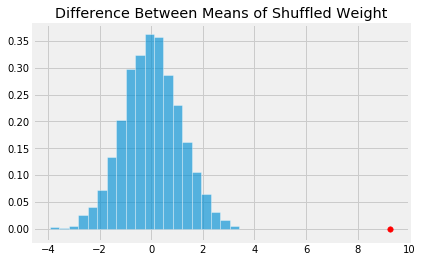

In [214]:
# Simulate Null Hypothesis 

diff = []

for i in np.arange(5000):
    # Get weight col for shuffling
    original_shuffled_weights = baby[['Maternal Smoker', 'Birth Weight']]
    # columns = ['Maternal_Smoker', 'Birth_Weight']

    original_shuffled_weights = original_shuffled_weights.rename(columns={'Maternal Smoker':'maternal_smoker', 
                            'Birth Weight':'birth_weight' })
    # Sample at random without replacement
    original_shuffled_weights['shuffled_weights'] = random.sample(list(original_shuffled_weights['birth_weight']), 
                                            len(original_shuffled_weights['birth_weight']))

    # table with shuffled weight
    shuffle_tbl = original_shuffled_weights
    # array of means of the two groups
    means = shuffle_tbl.groupby(by='maternal_smoker', as_index=False).mean()
    # difference between means of the two group 
    new_diff = means.shuffled_weights[0]- means.shuffled_weights[1]
    # update diff
    diff.append(new_diff)

# Visualize using 
pd.DataFrame(diff, 
             columns=['Difference Between Means of Shuffled Weight']).hist(
    bins=20,
    edgecolor='white', 
    alpha=0.65,normed=True)
plt.scatter(observed_diff, 0, color='red', s=30)
plt.show()


**Conclusion**: The histogram above shows the distribution of these 5,000 values. It is the empirical distribution of the test statistic simulated under the null hypothesis. It is a prediction made by the null hypothesis, about the statistic.


*Note: This notebook is based on the Berkeley's Data Science course on EdX. More reference can be found [here](https://www.inferentialthinking.com/)*